In [1]:
from google.colab import files
uploaded = files.upload()

Saving cache.py to cache.py
Saving cifar10.py to cifar10.py
Saving dataset.py to dataset.py
Saving download.py to download.py


In [0]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import ensemble, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression

In [0]:
cifar10.data_path = "data/CIFAR-10/"

In [4]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [21]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [7]:
images_train.shape

(50000, 32, 32, 3)

In [8]:
cls_train.shape

(50000,)

In [9]:
labels_train.shape

(50000, 10)

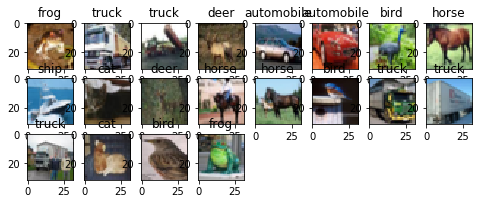

In [10]:
fig = plt.figure(figsize=(8,8))
for i in range(20):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
    plt.title(class_names[cls_train[i]])

In [12]:
x = images_train.reshape((50000,3072))
x.shape

(50000, 3072)

In [13]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_

array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
       1.64690026e-06, 1.60936325e-06, 1.58719044e-06])

In [14]:
k=0 
total = sum(pca.explained_variance_)
current_sum = 0
while( current_sum/total <0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

In [0]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(x)

In [16]:
transformed_data.shape

(50000, 658)

In [17]:
images_test.shape

(10000, 32, 32, 3)

In [0]:
y_train = cls_train
y_test = cls_test

In [0]:
x_train = transformed_data


In [0]:
x = images_test.reshape((10000,3072))
x_test = pca.transform(x)

In [0]:
algo = ensemble.RandomForestClassifier()
algo.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
def predict(x_test,y_test):
  y_pred = algo.predict(x_test)
  for i in range(len(y_pred)):
    #print(class_names[y_pred[i]])
    if(y_pred[i] == y_test[i]):
      print("right")
    else:
      print("wrong")
  return y_pred
  

In [0]:
y_pred = predict(x_test, y_test)

right
wrong
right
wrong
right
right
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
right
right
right
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
right
right
wrong
right
wrong
wrong
right
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
right
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
right
right
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
right
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
right
right
right
wrong
wrong
wrong
right
wrong
wrong
right
right
wrong
wrong
wrong
right
wrong
wrong
wrong
right
wrong
right
right
wrong
right
wrong
right
wrong
right
right
right
right
wrong
right
wrong
wrong
wrong
right
wrong
right
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
right
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
righ

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.37      0.28      1000
           1       0.24      0.32      0.27      1000
           2       0.17      0.24      0.20      1000
           3       0.15      0.16      0.16      1000
           4       0.23      0.22      0.22      1000
           5       0.22      0.18      0.19      1000
           6       0.29      0.21      0.25      1000
           7       0.20      0.13      0.16      1000
           8       0.37      0.28      0.31      1000
           9       0.27      0.16      0.20      1000

   micro avg       0.23      0.23      0.23     10000
   macro avg       0.24      0.23      0.22     10000
weighted avg       0.24      0.23      0.22     10000



In [0]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
def predict_knn(x_test,y_test):
  y_pred = clf.predict(x_test)
  for i in range(len(y_pred)):
    #print(class_names[y_pred[i]])
    if(y_pred[i] == y_test[i]):
      print("right")
    else:
      print("wrong")
  return y_pred

In [0]:
y_pred2 = predict_knn(x_test, y_test)

wrong
right
right
right
wrong
right
wrong
wrong
wrong
wrong
right
wrong
right
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
right
right
right
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
right
wrong
right
right
right
wrong
wrong
wrong
wrong
wrong
right
right
wrong
wrong
wrong
wrong
right
wrong
right
wrong
right
wrong
right
right
wrong
wrong
wrong
right
right
wrong
wrong
wrong
wrong
right
right
wrong
wrong
right
wrong
wrong
right
right
wrong
wrong
wrong
wrong
right
right
wrong
wrong
right
wrong
wrong
right
right
wrong
right
right
wrong
right
right
right
wrong
wrong
wrong
wrong
wrong
wrong
right
wrong
wrong
wrong
right
right
wrong
wrong
right
wrong
wrong
wrong
right
wrong
wrong
wrong
right
wrong
right
wrong
wrong
right
wrong
wrong
wrong
wrong
right
right
righ

In [0]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.39      0.55      0.45      1000
           1       0.65      0.22      0.32      1000
           2       0.23      0.44      0.30      1000
           3       0.29      0.21      0.24      1000
           4       0.24      0.51      0.33      1000
           5       0.40      0.22      0.28      1000
           6       0.35      0.27      0.30      1000
           7       0.67      0.21      0.32      1000
           8       0.41      0.66      0.50      1000
           9       0.71      0.15      0.24      1000

   micro avg       0.34      0.34      0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



In [0]:
y_pred2
np.set_printoptions(precision=0)
pred = np.array(y_pred2)
print(pred)
np.savetxt("Y_pred.csv",pred,delimiter=",")

[2 8 8 ... 5 6 4]


In [0]:
pred = []
for i in range(len(y_pred2)):
  pred.append(class_names[y_pred2[i]])


In [0]:
import pandas
df = pandas.DataFrame(data=pred)
df.to_csv("y_pred.csv", sep=',',index=False)

In [0]:
from google.colab import files
files.download('y_pred.csv') 

In [24]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred2 = clf.predict(x_test)

In [36]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.45      0.47      0.46      1000
           2       0.33      0.28      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.35      0.27      0.30      1000
           5       0.33      0.34      0.34      1000
           6       0.40      0.48      0.43      1000
           7       0.45      0.44      0.45      1000
           8       0.49      0.54      0.51      1000
           9       0.43      0.46      0.44      1000

   micro avg       0.40      0.40      0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [0]:
pred = []
for i in range(len(y_pred2)):
  pred.append(class_names[y_pred2[i]])
import pandas
df = pandas.DataFrame(data=pred)
df.to_csv("y_pred.csv", sep=',',index=False)
from google.colab import files
files.download('y_pred.csv') 